In [17]:
from src.connecting_db import connect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
conn = connect()

In [8]:
df = pd.read_sql("select * from Vendor_summary_data",conn)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,11101.0,10329.175930,18478.053301,2.00,3252.00,7153.00,9552.00,201359.00
Brand,11101.0,18254.831006,12600.526806,58.00,6206.00,19070.00,25570.00,90631.00
PurchasePrice,11101.0,25.008177,109.078281,0.36,6.88,10.52,19.72,5681.81
Volume,11101.0,844.887848,654.811062,50.00,750.00,750.00,750.00,20000.00
Total_purchase_Quantity,11101.0,3077.337807,10916.912273,1.00,34.00,250.00,1941.00,337660.00
Total_Purchase_Dollars,11101.0,29443.158025,120964.323767,0.71,446.16,3556.44,20025.94,3811251.60
Total_Sales_Dollars,11101.0,28004.006696,110232.511255,0.00,589.41,3887.52,18949.16,3420235.53
Total_Sales_Quantity,11101.0,2054.674173,7354.302525,0.00,25.00,180.00,1270.00,233712.00
Total_Sales_Price,11101.0,12741.029672,30874.322422,0.00,224.75,2074.80,10517.37,483334.64
Total_ExciseTax,11101.0,1176.879976,7378.614492,0.00,3.65,33.07,272.43,242064.52


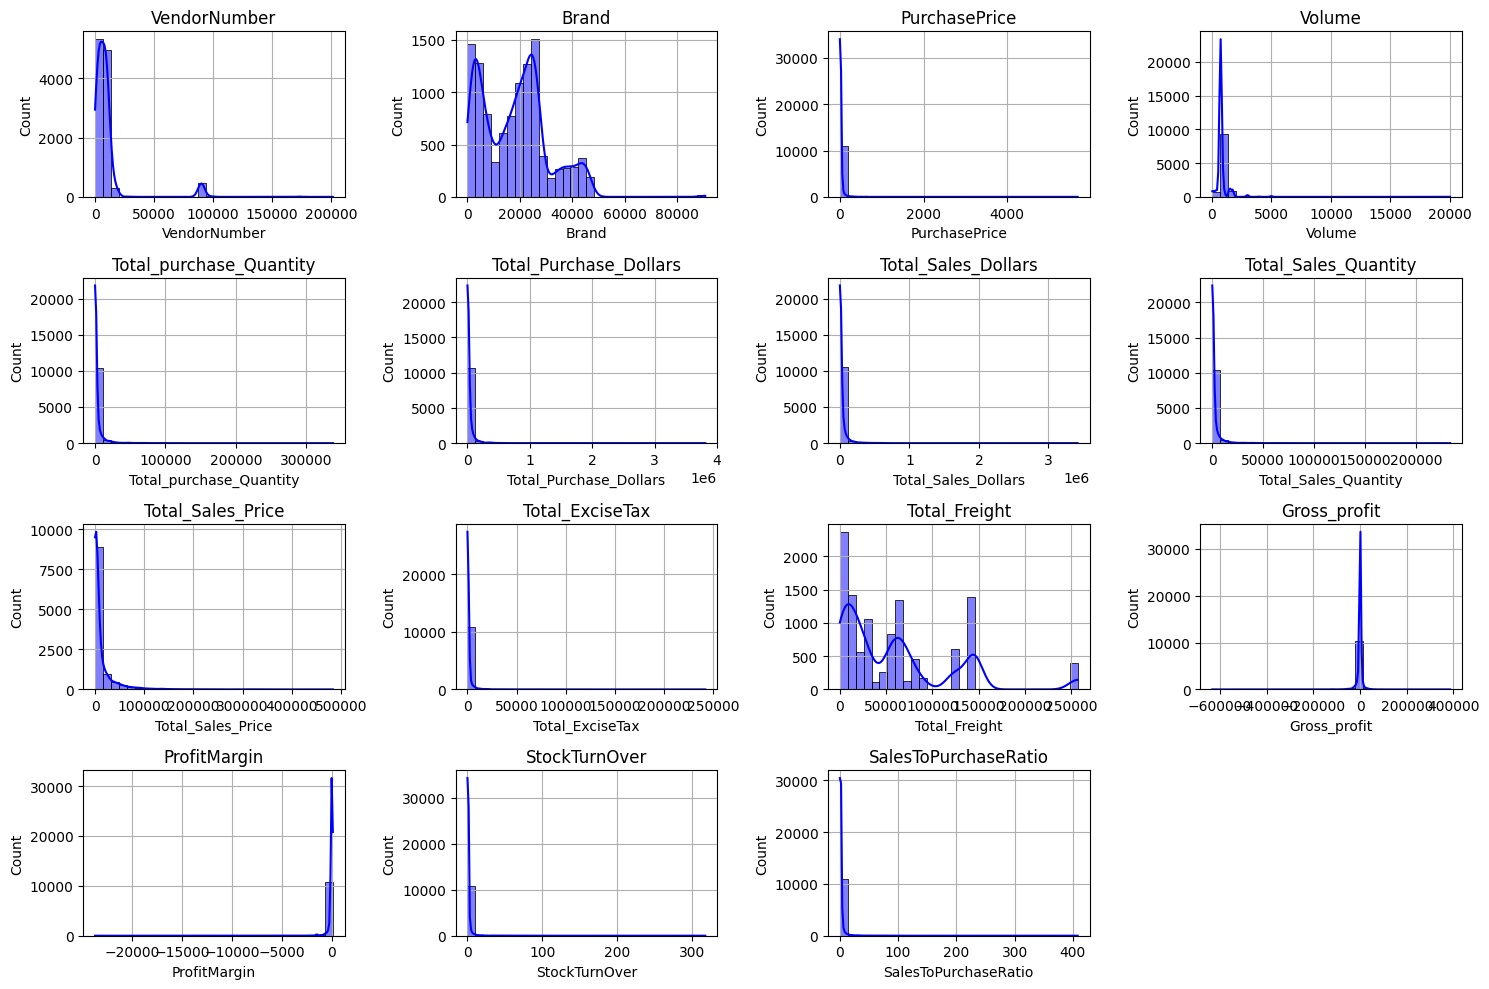

In [21]:
numeric_col = df.select_dtypes(include="number").columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_col):
    plt.subplot(4,4,i+1)
    #plt.hist(df[col],bins=30)
    sns.histplot(df[col],kde=True, bins=30,color='blue')
    plt.grid(True)
    plt.title(col)
plt.tight_layout()
plt.show()

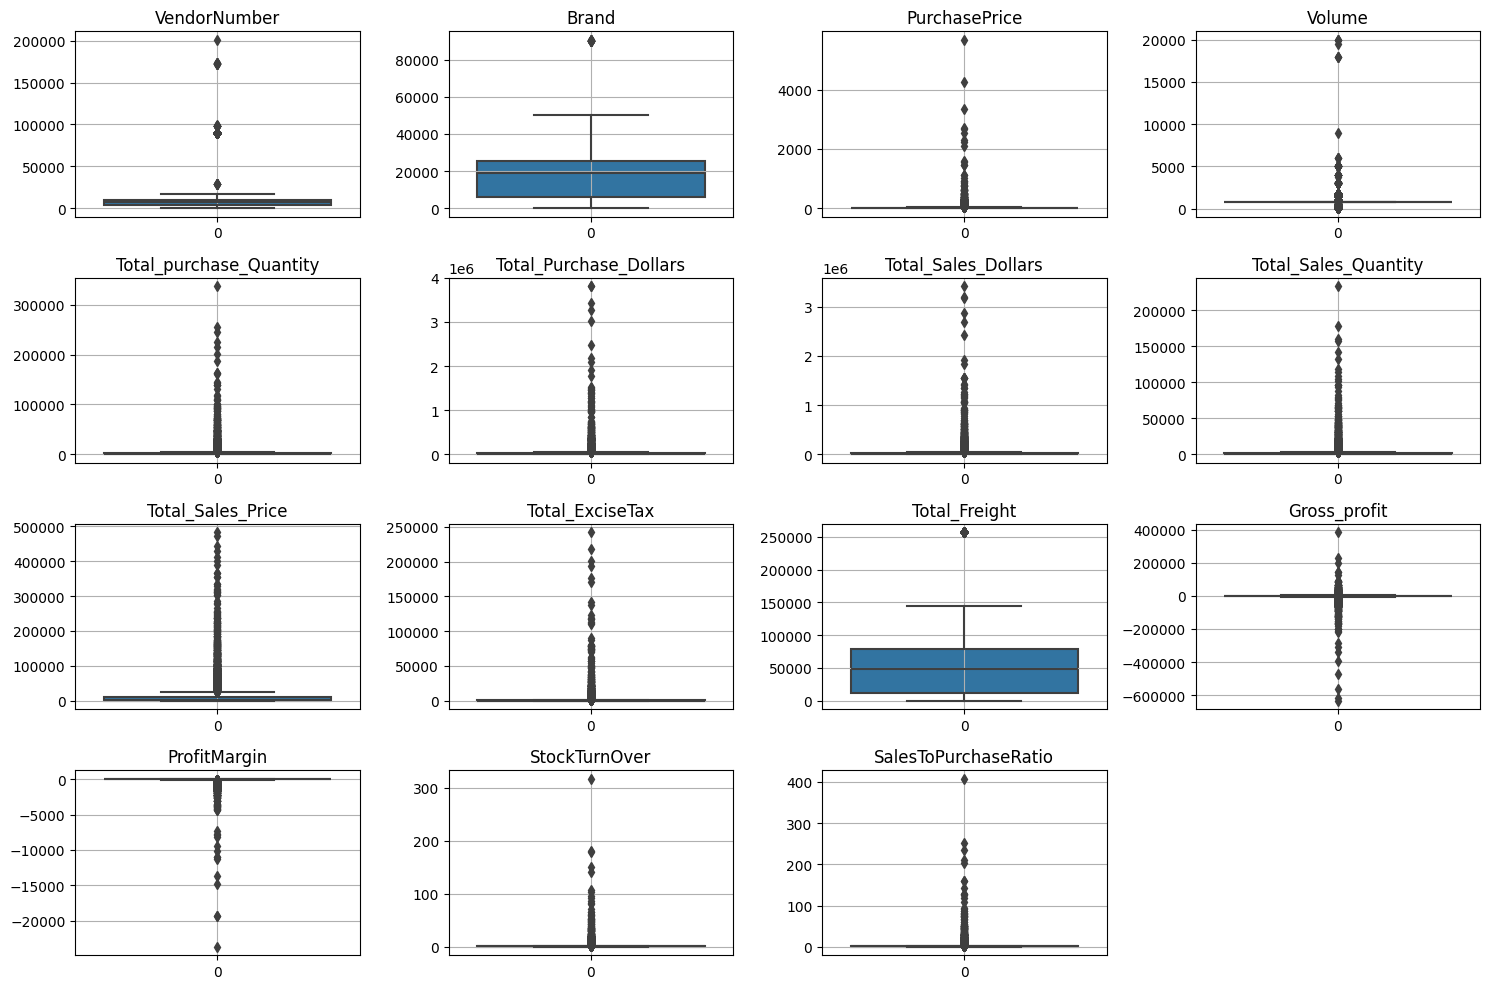

In [24]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_col):
    plt.subplot(4,4,i+1)
    #plt.hist(df[col],bins=30)
    sns.boxplot(df[col])
    plt.grid(True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [58]:
good_data = pd.read_sql('''select * from Vendor_summary_data
where Gross_profit>0
and ProfitMargin>0
and Total_Sales_Quantity >0''',conn)

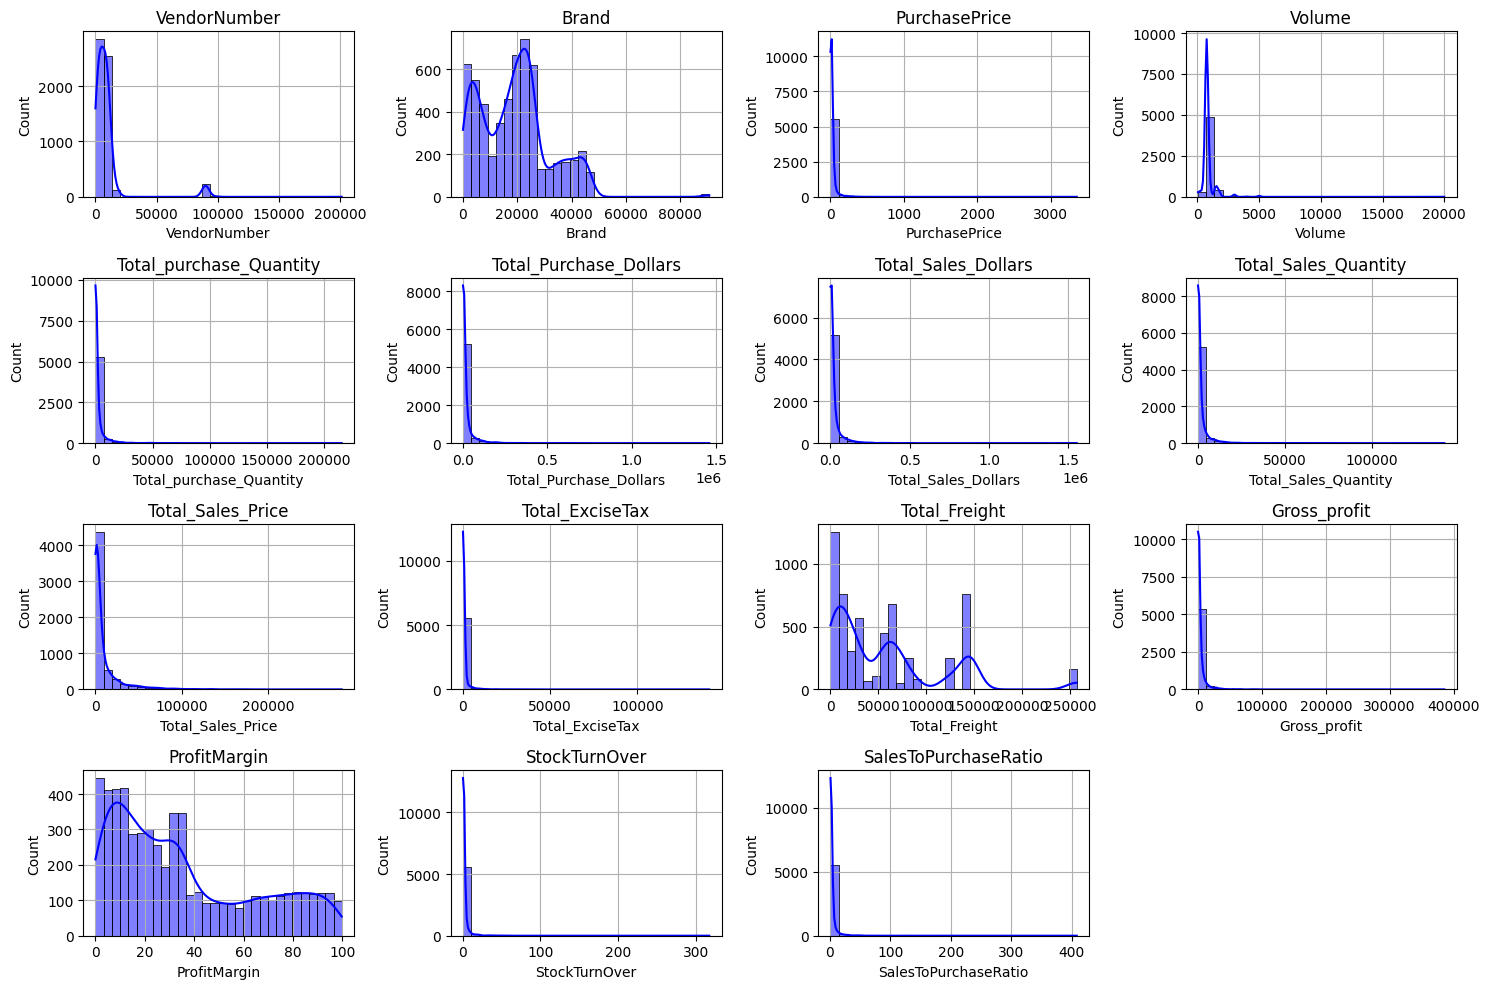

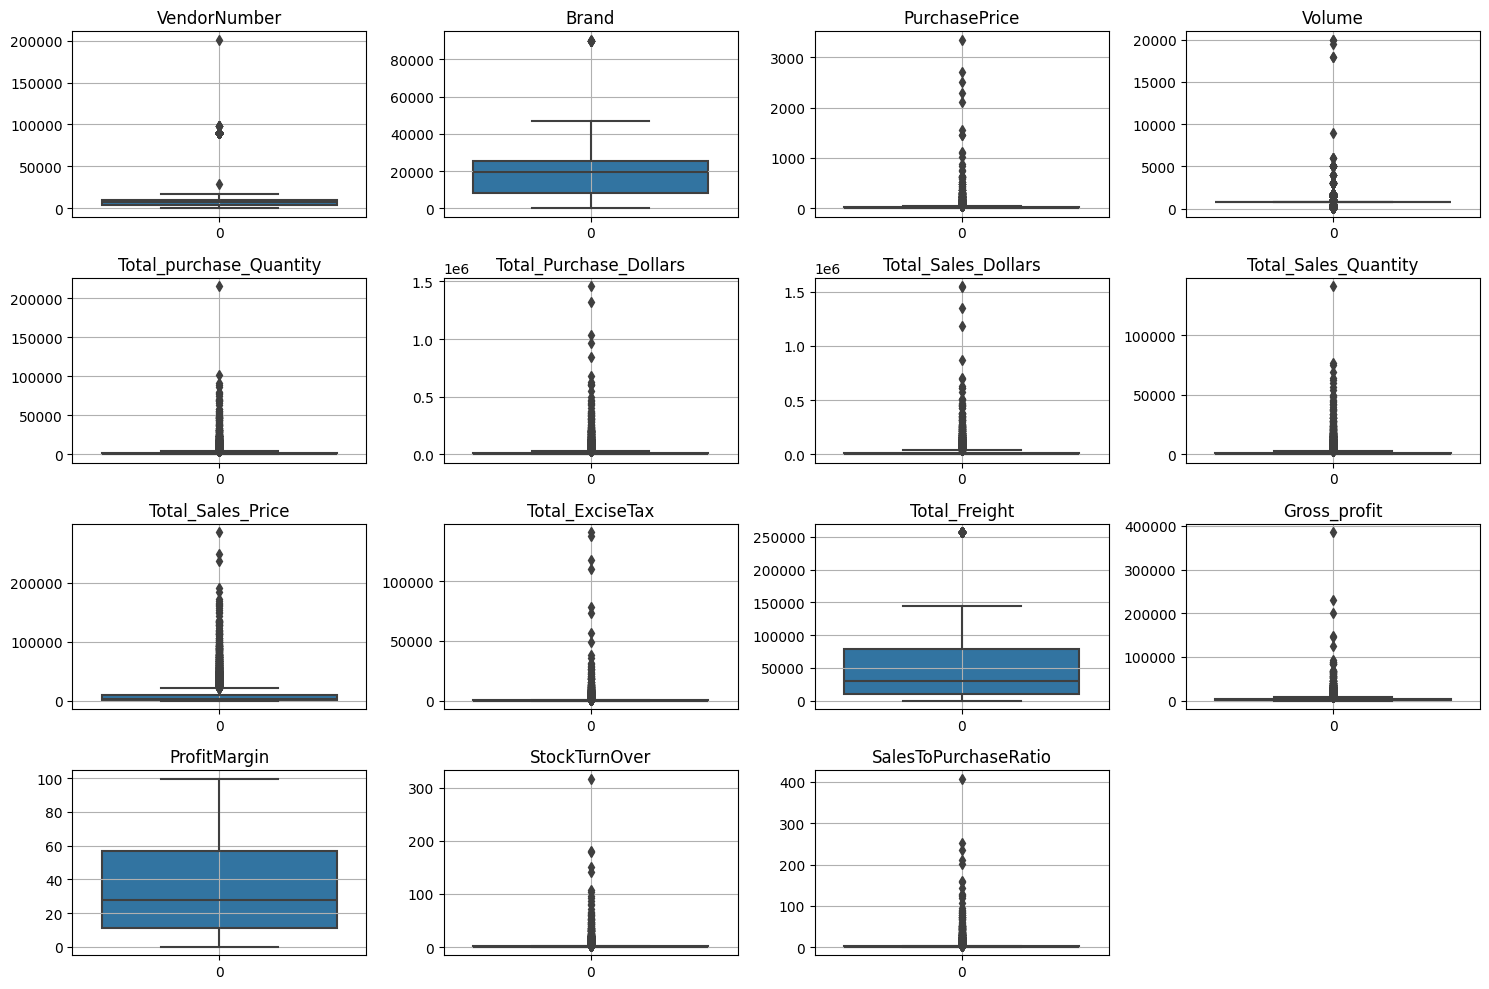

In [32]:

numeric_col = good_data.select_dtypes(include="number").columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_col):
    plt.subplot(4,4,i+1)
    #plt.hist(df[col],bins=30)
    sns.histplot(good_data[col],kde=True, bins=30,color='blue')
    plt.grid(True)
    plt.title(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_col):
    plt.subplot(4,4,i+1)
    #plt.hist(df[col],bins=30)
    sns.boxplot(good_data[col])
    plt.grid(True)
    plt.title(col)
plt.tight_layout()
plt.show()

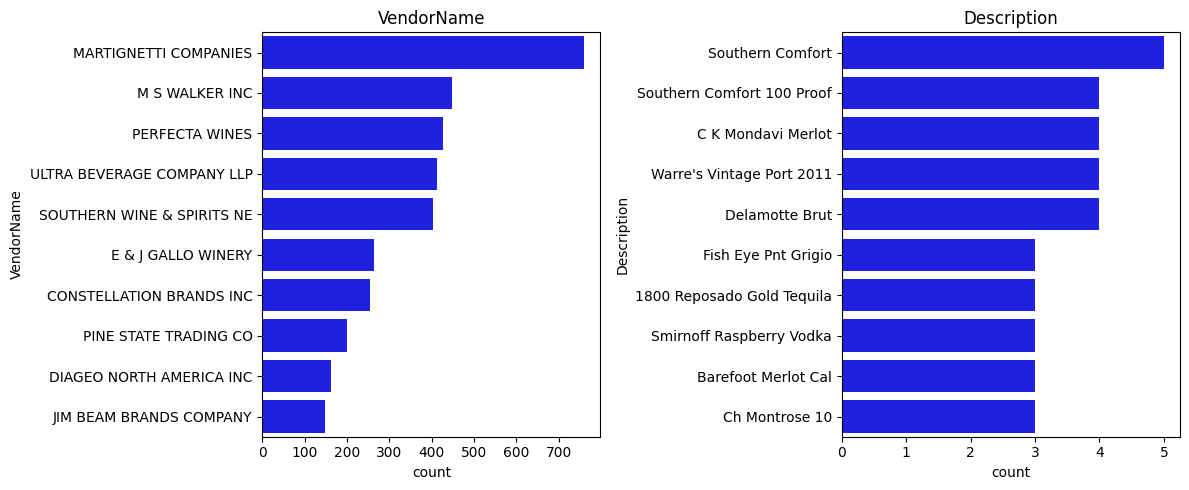

In [43]:
cat_cols = ['VendorName',"Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(cat_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=good_data[col],order=good_data[col].value_counts().index[:10],color='blue')
    plt.title(col)
    plt.tight_layout()
plt.show()


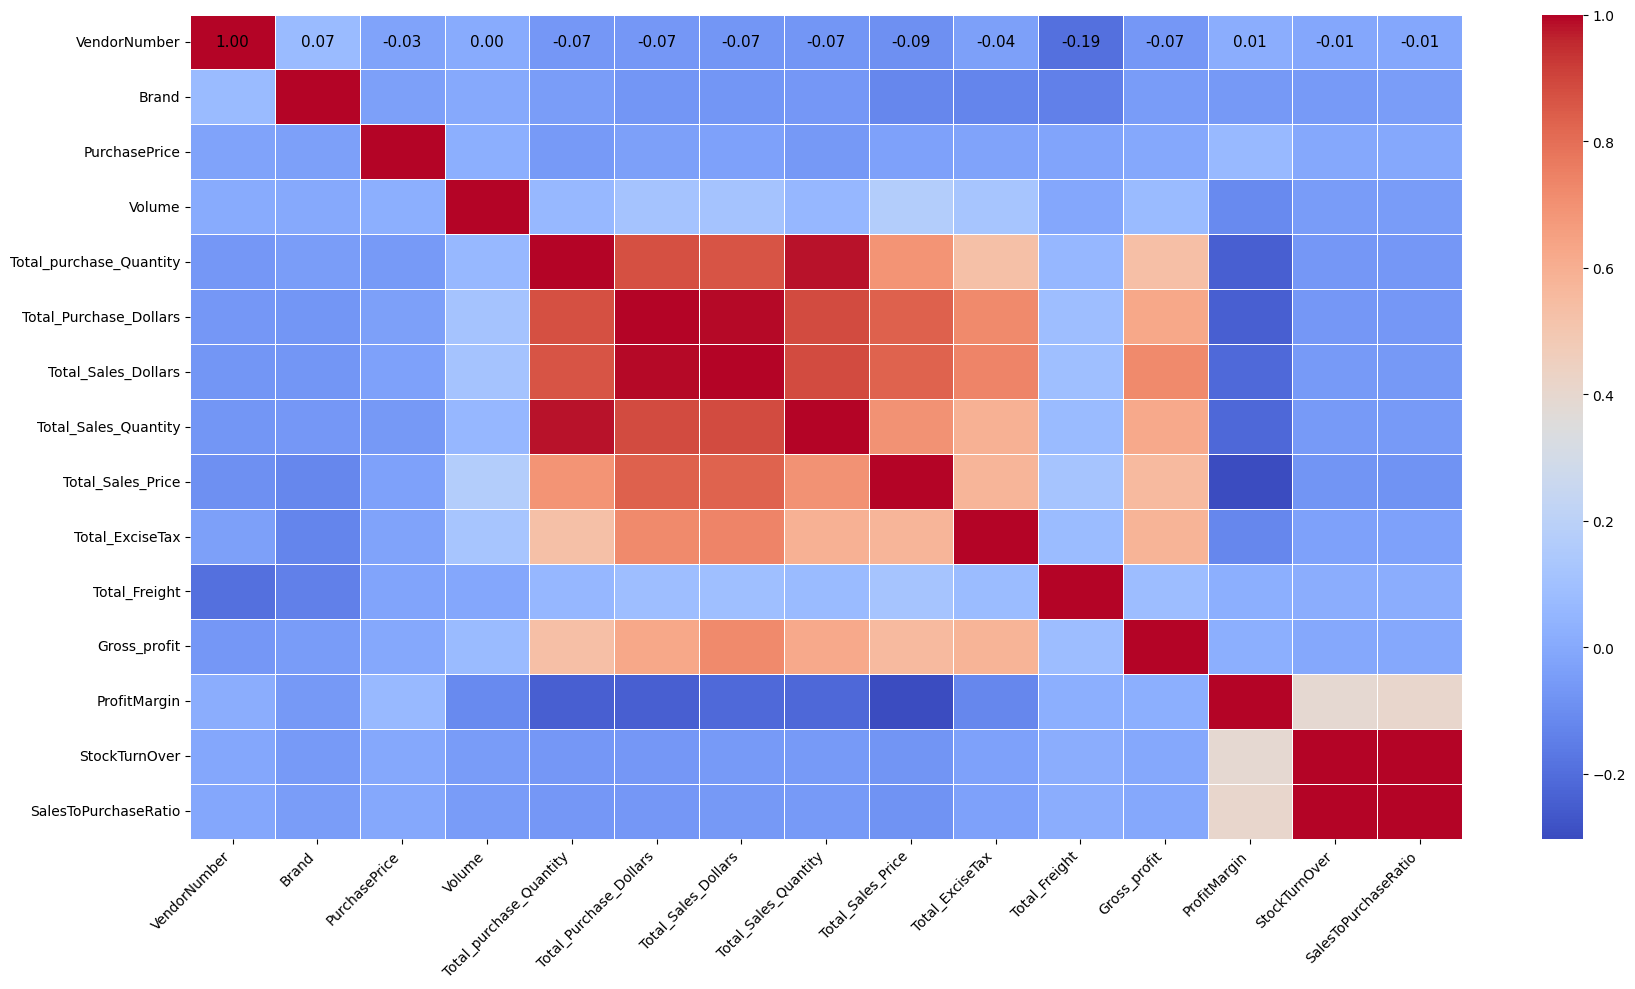

In [59]:
plt.figure(figsize=(18,10))

corr_mat = good_data[numeric_col].corr()

sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"color": "black", "size": 11}  # 👈 MAIN FIX
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [60]:
corr_mat

,VendorNumber,Brand,PurchasePrice,Volume,Total_purchase_Quantity,Total_Purchase_Dollars,Total_Sales_Dollars,Total_Sales_Quantity,Total_Sales_Price,Total_ExciseTax,Total_Freight,Gross_profit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
VendorNumber,1.000000,0.069538,-0.026408,0.003091,-0.067613,-0.065740,-0.069260,-0.070671,-0.089533,-0.037056,-0.193719,-0.065723,0.012753,-0.010095,-0.009154
Brand,0.069538,1.000000,-0.036092,0.001476,-0.048118,-0.071042,-0.071864,-0.065724,-0.120033,-0.129278,-0.142878,-0.053163,-0.061608,-0.056936,-0.045969
PurchasePrice,-0.026408,-0.036092,1.000000,0.017939,-0.058598,-0.033754,-0.030727,-0.062026,-0.028993,-0.024517,-0.022951,-0.004784,0.066832,-0.003832,-0.004932
Volume,0.003091,0.001476,0.017939,1.000000,0.063230,0.111372,0.110246,0.056936,0.169982,0.121132,-0.012199,0.068875,-0.114145,-0.049902,-0.050111
Total_purchase_Quantity,-0.067613,-0.048118,-0.058598,0.063230,1.000000,0.877753,0.867196,0.984361,0.692194,0.530667,0.056980,0.532709,-0.242691,-0.066046,-0.067528
Total_Purchase_Dollars,-0.065740,-0.071042,-0.033754,0.111372,0.877753,1.000000,0.991532,0.884763,0.833017,0.722828,0.086501,0.628223,-0.245970,-0.064558,-0.066703
Total_Sales_Dollars,-0.069260,-0.071864,-0.030727,0.110246,0.867196,0.991532,1.000000,0.887725,0.831426,0.738039,0.090508,0.723941,-0.214709,-0.057980,-0.059931
Total_Sales_Quantity,-0.070671,-0.065724,-0.062026,0.056936,0.984361,0.884763,0.887725,1.000000,0.699157,0.592294,0.070760,0.618463,-0.216935,-0.054544,-0.056781
Total_Sales_Price,-0.089533,-0.120033,-0.028993,0.169982,0.692194,0.833017,0.831426,0.699157,1.000000,0.577410,0.114774,0.556050,-0.303045,-0.079049,-0.081976
Total_ExciseTax,-0.037056,-0.129278,-0.024517,0.121132,0.530667,0.722828,0.738039,0.592294,0.577410,1.000000,0.077140,0.581905,-0.119997,-0.029326,-0.031357


In [63]:
brand_performance = good_data.groupby("Description").agg({
    "Total_Sales_Dollars":'sum',
    "ProfitMargin":'mean'
}).reset_indext_index()

In [64]:
brand_performance

,Description,Total_Sales_Dollars,ProfitMargin
0,10 Span Chard CC,2726.36,11.94
1,10 Span Pnt Gris Monterey Cy,1707.72,17.36
2,10 Span Pnt Nr CC,1894.97,4.44
3,12 Days of Pearls Gift Set,359.64,98.00
4,13 Celsius Svgn Bl,21837.94,34.02
...,...,...,...
5204,Zonin Moscato,239.76,18.32
5205,Zorah Red,439.80,69.18
5206,Zuccardi Q Malbec,1639.18,23.98
5207,Zwack Liqueur,227.88,16.65


In [69]:
lower_bound = brand_performance['Total_Sales_Dollars'].quantile(0.15)
upper_bound = brand_performance['ProfitMargin'].quantile(0.85)
print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")


Lower Bound: 399.824
Upper Bound: 75.036


In [68]:
target_brand = brand_performance[(brand_performance['Total_Sales_Dollars']<=lower_bound)&
                                 (brand_performance['ProfitMargin']>=upper_bound)]

In [102]:
new_brand_perf = brand_performance[brand_performance["Total_Sales_Dollars"]<3000]

Text(0.5, 1.0, 'Targeted Brands')

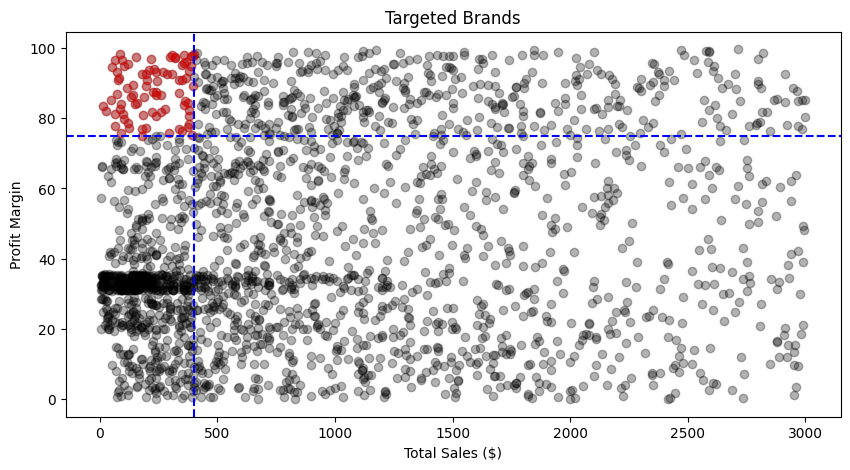

In [103]:
plt.figure(figsize=(10,5))
plt.scatter(new_brand_perf["Total_Sales_Dollars"],new_brand_perf['ProfitMargin'],alpha=0.3,color='black')
plt.scatter(target_brand["Total_Sales_Dollars"],target_brand['ProfitMargin'],alpha=0.3,color='red')
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin")

plt.axhline(upper_bound,color='blue',linestyle='--')
plt.axvline(lower_bound,color='blue',linestyle='--')

plt.title("Targeted Brands")


In [119]:
top_vendor = good_data.groupby("VendorName")['Total_Sales_Dollars'].sum().nlargest(10)
top_brand = good_data.groupby("Description")['Total_Sales_Dollars'].sum().nlargest(10)


In [117]:
def format_num(val):
    if val>=1000000:
        return f"{val/1000000:.2f}M"
    if val>=1000:
        return f"{val/1000:.2f}K"

In [121]:
top_vendor.apply(lambda x: format_num(x))

VendorName
MARTIGNETTI COMPANIES         15.14M
CONSTELLATION BRANDS INC      11.06M
DIAGEO NORTH AMERICA INC       8.39M
E & J GALLO WINERY             6.96M
SOUTHERN WINE & SPIRITS NE     6.02M
ULTRA BEVERAGE COMPANY LLP     5.49M
WINE GROUP INC                 5.19M
M S WALKER INC                 5.16M
PROXIMO SPIRITS INC.           4.95M
BACARDI USA INC                4.51M
Name: Total_Sales_Dollars, dtype: object

In [120]:
top_brand.apply(lambda x: format_num(x))

Description
Kendall Jackson Chard Vt RSV      1.55M
Capt Morgan Original Barrel       1.55M
Bacardi Superior Rum Trav         1.35M
Three Olives Vodka                1.30M
Jack Daniels No 7 Black         873.99K
Cavit Pinot Grigio              782.45K
R M Woodbridge Chard Cal        717.35K
Josh Cellars Cab Svgn Sonoma    701.38K
Grand Marnier                   694.28K
Jose Cuervo Especial            670.73K
Name: Total_Sales_Dollars, dtype: object